In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
ds = xr.open_dataset('../../data/sst.mnmean.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2016, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-01-07

In [3]:
Twinter=ds['sst'].loc[ds.time.dt.month.isin([12,1,2])].loc['2019-03-01':'2020-03-01']
Twinter

<xarray.DataArray 'sst' (time: 3, lat: 89, lon: 180)>
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2019-12-01 2020-01-01 2020-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [4]:
Twinterave=Twinter.mean(dim='time')
Twinterave

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [5]:
lat=Twinterave['lat']
lon=Twinterave['lon']

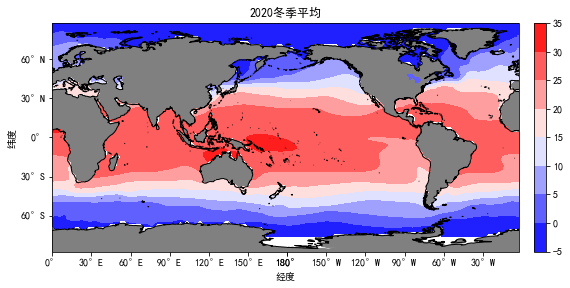

In [6]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
# 添加海岸线和陆地
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAND,facecolor='grey')
# 添加坐标轴
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter(auto_hide=False)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置刻度大小
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_title('2020冬季平均')

# 绘图
colorbar = ax.contourf(lon,lat,Twinterave,cmap='bwr',transform=ccrs.PlateCarree())
plt.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.04, shrink=0.7)

# 保存图片
plt.savefig('../../picture/pythonhome/11/qu1.png')

In [7]:
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2016, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-01-07

In [8]:
# 计算ENSO指数：计算5°s-5°N，170°W-120°W内的区域平均
ENSOall=ds['sst'].loc[:,5:-5,190:240].mean(dim=['lat','lon'],skipna=True)
ENSOall[:]

<xarray.DataArray 'sst' (time: 2016)>
array([25.897709, 26.05581 , 26.908752, ..., 25.77267 , 25.762094,
       25.544031], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01

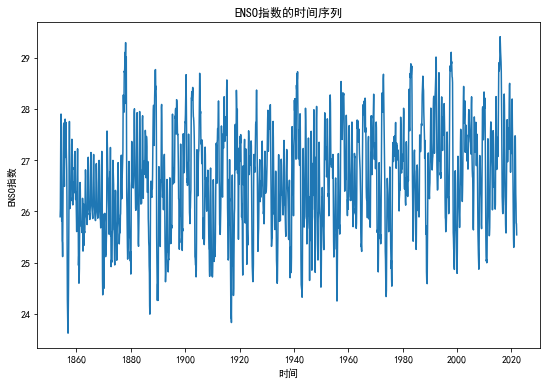

In [9]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
ax.plot(ds['time'],ENSOall)
ax.set_xlabel('时间')
ax.set_ylabel('ENSO指数')
ax.set_title('ENSO指数的时间序列')

# 保存图片
plt.savefig('../../picture/pythonhome/11/qu2.png')

In [10]:
# 分别计算四个季节的ENSO指数
ENSOseason=ds['sst'].groupby(ds.time.dt.season).mean(dim='time').loc[:,5:-5,190:240].mean(dim=['lat','lon'],skipna=True)
ENSOseason

<xarray.DataArray 'sst' (season: 4)>
array([26.281464, 26.811226, 27.24905 , 26.232914], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

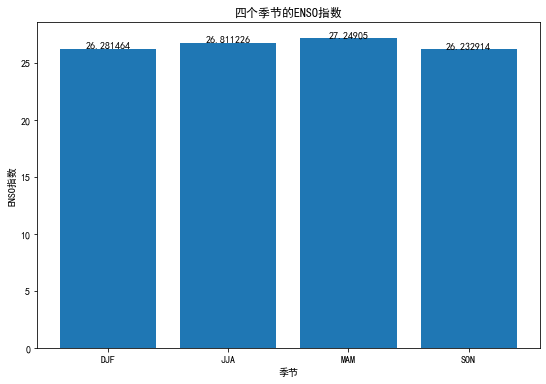

In [11]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
ax.bar(ENSOseason.season,ENSOseason)
ax.set_xlabel('季节')
ax.set_ylabel('ENSO指数')
ax.set_title('四个季节的ENSO指数')
for i,j in zip(ENSOseason.season,ENSOseason):
    ax.text(i,j.data,j.data,ha='center')
# 保存图片
plt.savefig('../../picture/pythonhome/11/qu3.png')

In [12]:
# 以sst>=|0.5K|为标准在过去的几十年中，El Nino和La Nina年分别是哪一年
sstave=ds['sst'].mean(dim='time')
sstave

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7998481, -1.7998575, -1.7998646, ..., -1.7998819, -1.7998582,
        -1.7998413],
       [-1.799857 , -1.7998397, -1.7998296, ..., -1.7999817, -1.7999095,
        -1.7998827],
       [-1.8000275, -1.7999699, -1.799932 , ..., -1.7999892, -1.8000056,
        -1.8000206],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [13]:
sst=ds['sst']
# 距平场
sstjuping=sst-sstave
# 距平场的区域平均
sstjuping=sstjuping.loc[:,5:-5,190:240].mean(dim=['lat','lon'],skipna=True)

In [14]:
# 求年平均
sstjupingyear=sstjuping.groupby(ds.time.dt.year).mean(dim='time')
sstjupingyear

<xarray.DataArray 'sst' (year: 168)>
array([-0.27901283,  0.53887945, -0.79377913, -0.49743035,  0.01381396,
        0.0156523 , -0.6605402 , -0.8556995 , -0.95602196, -0.56900066,
       -0.35242435, -0.28149888, -0.3221899 , -0.39931533, -0.39802742,
       -0.83826923, -1.2486324 , -0.11339114, -0.78456354, -0.56990427,
       -1.071779  , -0.5927753 , -0.26286563,  1.6162647 ,  0.47199443,
       -0.7494994 , -0.21297091,  0.27370268, -0.22139291,  0.06209752,
        0.33742368,  0.50778013, -0.8580026 , -0.66962093,  1.1704594 ,
       -0.06664982, -0.9321185 ,  0.27976942, -0.790312  , -1.1027724 ,
       -0.9189873 ,  0.07730261,  0.968323  ,  0.15831277, -0.6120045 ,
        0.22558771,  0.8393369 , -0.11646404,  1.2146426 , -0.21488364,
       -0.28697327,  1.2190522 , -0.22441082, -0.30146205, -0.5932198 ,
       -1.0453684 , -1.185916  ,  0.08344454,  0.22287995,  0.12389604,
        1.0010883 ,  0.18555258, -1.0712985 , -1.3870167 ,  0.39811984,
        0.26008293,  0.19583876, -0.2877738 , -0.6633001 ,  0.137851  ,
       -0.61011195,  0.01340577,  0.2309341 , -0.21348888, -0.09869134,
       -0.1239958 ,  0.79089445,  0.19254015, -0.15764934, -1.0652403 ,
       -0.4786745 , -0.241648  , -0.26159406, -0.1477725 , -1.1184852 ,
       -0.17742525,  1.0936302 ,  1.3195462 , -0.5813868 , -0.607824  ,
       -0.02982099, -0.51498747, -0.5090077 , -0.16348676, -0.30373248,
       -0.6234893 , -0.91125995,  0.38370433,  0.1016582 ,  0.675997  ,
       -0.4642035 , -1.0084409 , -0.55972975,  0.96554905,  0.83548594,
        0.15238537,  0.07394686, -0.05435823, -0.25894699,  0.6282403 ,
       -0.4022585 ,  0.8829775 ,  0.46587762, -0.20255332,  0.22182052,
        0.8555936 , -0.20786224, -0.8018796 ,  1.1038779 , -0.47148395,
       -0.7369695 , -0.87838954,  0.10646022,  0.6879594 ,  0.06750116,
        0.41535214,  0.4360534 , -0.01856835,  1.265782  ,  0.74676734,
       -0.2291367 , -0.31765553,  0.49698195,  1.5277086 , -0.5609185 ,
       -0.3592378 ,  0.5681549 ,  1.0546018 ,  1.0403054 ,  0.7367615 ,
        0.8940851 ,  0.2435536 , -0.07897937,  1.5507613 ,  0.32457155,
       -0.84567815, -0.4649423 ,  0.10109713,  1.0731276 ,  0.64620894,
        0.85692674,  0.4534689 ,  0.52572626, -0.17803447, -0.34580478,
        0.7258925 , -0.04623574, -0.4212134 ,  0.29608858,  0.12100772,
        0.5414799 ,  1.8993014 ,  0.78147155,  0.23904468,  0.46577224,
        0.9303055 ,  0.08714997, -0.2817711 ], dtype=float32)
Coordinates:
  * year     (year) int64 1854 1855 1856 1857 1858 ... 2017 2018 2019 2020 2021

In [15]:
ElNino=[]
LaNina=[]
# 挑选年份
for i in sstjupingyear.year:
    if sstjupingyear.loc[i] >=0.5:
        ElNino.append(int(i.data))
    if sstjupingyear.loc[i] <=-0.5:
        LaNina.append(int(i.data))

In [16]:
ElNino

[1855,
 1877,
 1885,
 1888,
 1896,
 1900,
 1902,
 1905,
 1914,
 1930,
 1940,
 1941,
 1953,
 1957,
 1958,
 1963,
 1965,
 1969,
 1972,
 1977,
 1982,
 1983,
 1987,
 1990,
 1991,
 1992,
 1993,
 1994,
 1997,
 2002,
 2003,
 2004,
 2006,
 2009,
 2014,
 2015,
 2016,
 2019]

In [17]:
LaNina

[1856,
 1860,
 1861,
 1862,
 1863,
 1869,
 1870,
 1872,
 1873,
 1874,
 1875,
 1879,
 1886,
 1887,
 1890,
 1892,
 1893,
 1894,
 1898,
 1908,
 1909,
 1910,
 1916,
 1917,
 1922,
 1924,
 1933,
 1938,
 1942,
 1943,
 1945,
 1946,
 1949,
 1950,
 1955,
 1956,
 1971,
 1974,
 1975,
 1988,
 1999]

In [18]:
years=np.arange(1854,2022,1)

In [19]:
# 返回bool列表
def boollist(years,yichang):
    boolli=[]
    for i in years:
        if i in yichang:
            boolli.append(True)
            continue
        boolli.append(False)
    return boolli
# 手动实现交集
def jiao(list1,list2):
    boolli=[]
    for i in range(len(list1)):
        if list1[i] != list2[i]:
            boolli.append(False)
            continue
        boolli.append(True)
    return boolli

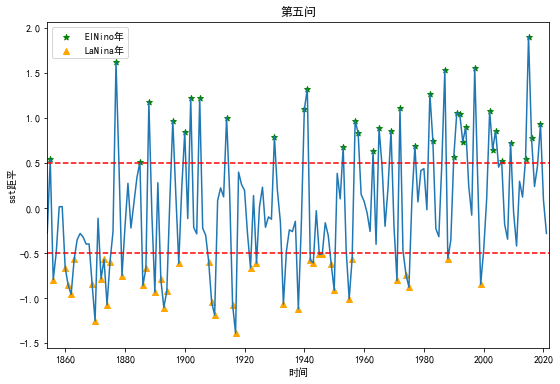

In [23]:
sel=jiao(boollist(years,ElNino),boollist(years,LaNina))
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
ax.plot(years,sstjupingyear)
ax.scatter(years[boollist(years,ElNino)],sstjupingyear[boollist(years,ElNino)],color='green',marker="*",label='ElNino年')
ax.scatter(years[boollist(years,LaNina)],sstjupingyear[boollist(years,LaNina)],color='orange',marker="^",label='LaNina年')
ax.axhline(y=0.5,color="red",linestyle="--")
ax.axhline(y=-0.5,color="red",linestyle="--")
ax.set_xlim(1854,2022)
ax.set_xlabel('时间')
ax.set_ylabel('sst距平')
ax.set_title('第五问')
plt.legend()
# 保存图片
plt.savefig('../../picture/pythonhome/11/qu4.png')